# Pokémon EDA

This notebook explores Pokémon data, found [here](https://www.kaggle.com/datasets/jgassdfe/pokemon-dataset-of-gen-1-gen-9).

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

In [47]:
pokemon_df = pd.read_csv('pokemon_data.csv')
pd.set_option('display.max_columns', None)

# Clean data

Convert column names to snake case.

In [48]:
def snake_case(text):
    snake_cased = []
    for i, char in enumerate(text):
        if char.isupper():
            if snake_cased and snake_cased[-1] != '_': 
                snake_cased.append('_')
            snake_cased.append(char.lower())
        elif char == ' ':
            if snake_cased and snake_cased[-1] != '_':
                snake_cased.append('_')
        else:
            snake_cased.append(char)
    
    return ''.join(snake_cased)

In [49]:
pokemon_df.columns = [snake_case(col) for col in pokemon_df.columns]
pokemon_df.head()

,i_d,name,h_p,attack,defense,sp._attack,sp._defense,speed,base_stats,normal_weakness,fire_weakness,water_weakness,electric_weakness,grass_weakness,ice_weakness,fighting_weakness,poison_weakness,ground_weakness,flying_weakness,psychic_weakness,bug_weakness,rock_weakness,ghost_weakness,dragon_weakness,dark_weakness,steel_weakness,fairy_weakness,height_inches,height_meters,weight_pounds,weight_kilograms,capturing_rate,gender_male_ratio,egg_steps,egg_cycles,abilities,type_1,type_2,classification_info,forms,gen,is_legendary,is_mythical,is_ultra_beast,number_immune,number_not_effective,number_normal,number_super_effective
0,1,Bulbasaur,45,49,49,65,65,45,318,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,204,0.7,15.2,6.9,45,88.1,5120,45,Chlorophyll; Overgrow,Grass,Poison,Seed,NaN,1,0,0,0,0,5,9,4
1,2,Ivysaur,60,62,63,80,80,60,405,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,303,1.0,28.7,13.0,45,88.1,5120,45,Chlorophyll; Overgrow,Grass,Poison,Seed,NaN,1,0,0,0,0,5,9,4
2,3,Venusaur,80,82,83,100,100,80,525,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,607,2.0,220.5,100.0,45,88.1,5120,45,Chlorophyll; Overgrow,Grass,Poison,Seed,Mega Venusaur,1,0,0,0,0,5,9,4
3,4,Charmander,39,52,43,60,50,65,309,1.0,0.5,2.0,1.0,0.50,0.5,1.0,1.0,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5,200,0.6,18.7,8.5,45,88.1,5120,45,Blaze; Solar Power,Fire,NaN,Lizard,NaN,1,0,0,0,0,6,9,3
4,5,Charmeleon,58,64,58,80,65,80,405,1.0,0.5,2.0,1.0,0.50,0.5,1.0,1.0,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5,307,1.1,41.9,19.0,45,88.1,5120,45,Blaze; Solar Power,Fire,NaN,Flame,NaN,1,0,0,0,0,6,9,3


# Insights

### What is the relationship between attack and speed?

Text(0.5, 1.0, 'Pokémon Attack, Speed Relationship')

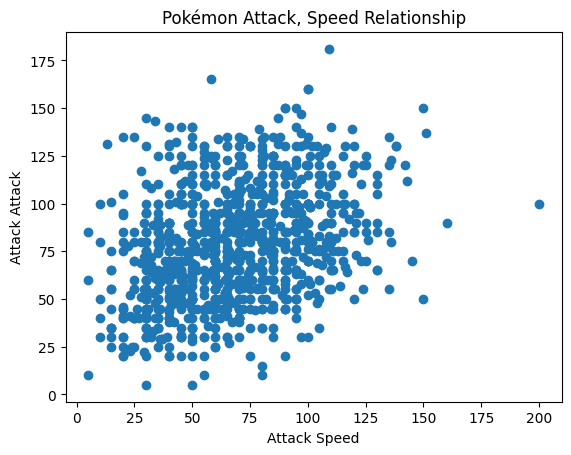

In [50]:
x = pokemon_df['speed']
y = pokemon_df['attack']

plt.scatter(x, y)
plt.xlabel('Attack Speed')
plt.ylabel('Attack Attack')
plt.title('Pokémon Attack, Speed Relationship')

In [51]:
correlation = x.corr(y)
print(correlation)

0.3523039164681193


### What's the relationship between weight and attack?

Text(0.5, 1.0, 'Pokémon Weight, Attack Relationship')

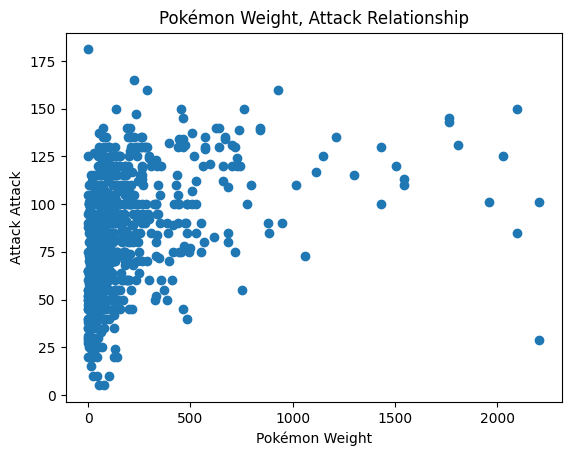

In [55]:
x = pokemon_df['weight_pounds']
y = pokemon_df['attack']

plt.scatter(x, y)
plt.xlabel('Pokémon Weight')
plt.ylabel('Attack Attack')
plt.title('Pokémon Weight, Attack Relationship')

In [60]:
strongest = pokemon_df[pokemon_df['attack'] == pokemon_df['attack'].max()]
print(strongest['name'])

797    Kartana
Name: name, dtype: object


## What portion of Pokémon are legendary?

In [52]:
legendary = pokemon_df[pokemon_df['is_legendary'] == 1]
print(f'There are {len(legendary)} legendary Pokémon: ')
print(legendary['name'].to_string())

There are 64 legendary Pokémon: 
143        Articuno
144          Zapdos
145         Moltres
149          Mewtwo
242          Raikou
243           Entei
244         Suicune
248           Lugia
249           Ho-Oh
376        Regirock
377          Regice
378       Registeel
379          Latias
380          Latios
381          Kyogre
382         Groudon
383        Rayquaza
479            Uxie
480         Mesprit
481           Azelf
482          Dialga
483          Palkia
484         Heatran
485       Regigigas
486        Giratina
487       Cresselia
637        Cobalion
638       Terrakion
639        Virizion
640        Tornadus
641       Thundurus
642        Reshiram
643          Zekrom
644        Landorus
645          Kyurem
715         Xerneas
716         Yveltal
717         Zygarde
772        Silvally
788          Cosmog
789         Cosmoem
790        Solgaleo
791          Lunala
799        Necrozma
887          Zacian
888       Zamazenta
889       Eternatus
890           Kubfu
891    

### Pie chart representation of Pokémon types

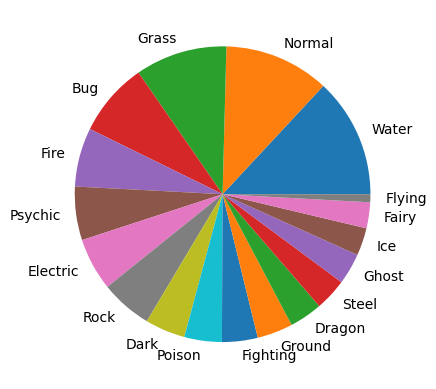

In [53]:
types = pokemon_df['type_1'].value_counts().plot.pie()
plt.ylabel('')
plt.show()